In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

In [3]:
plt.rcParams.update({'font.size':24})

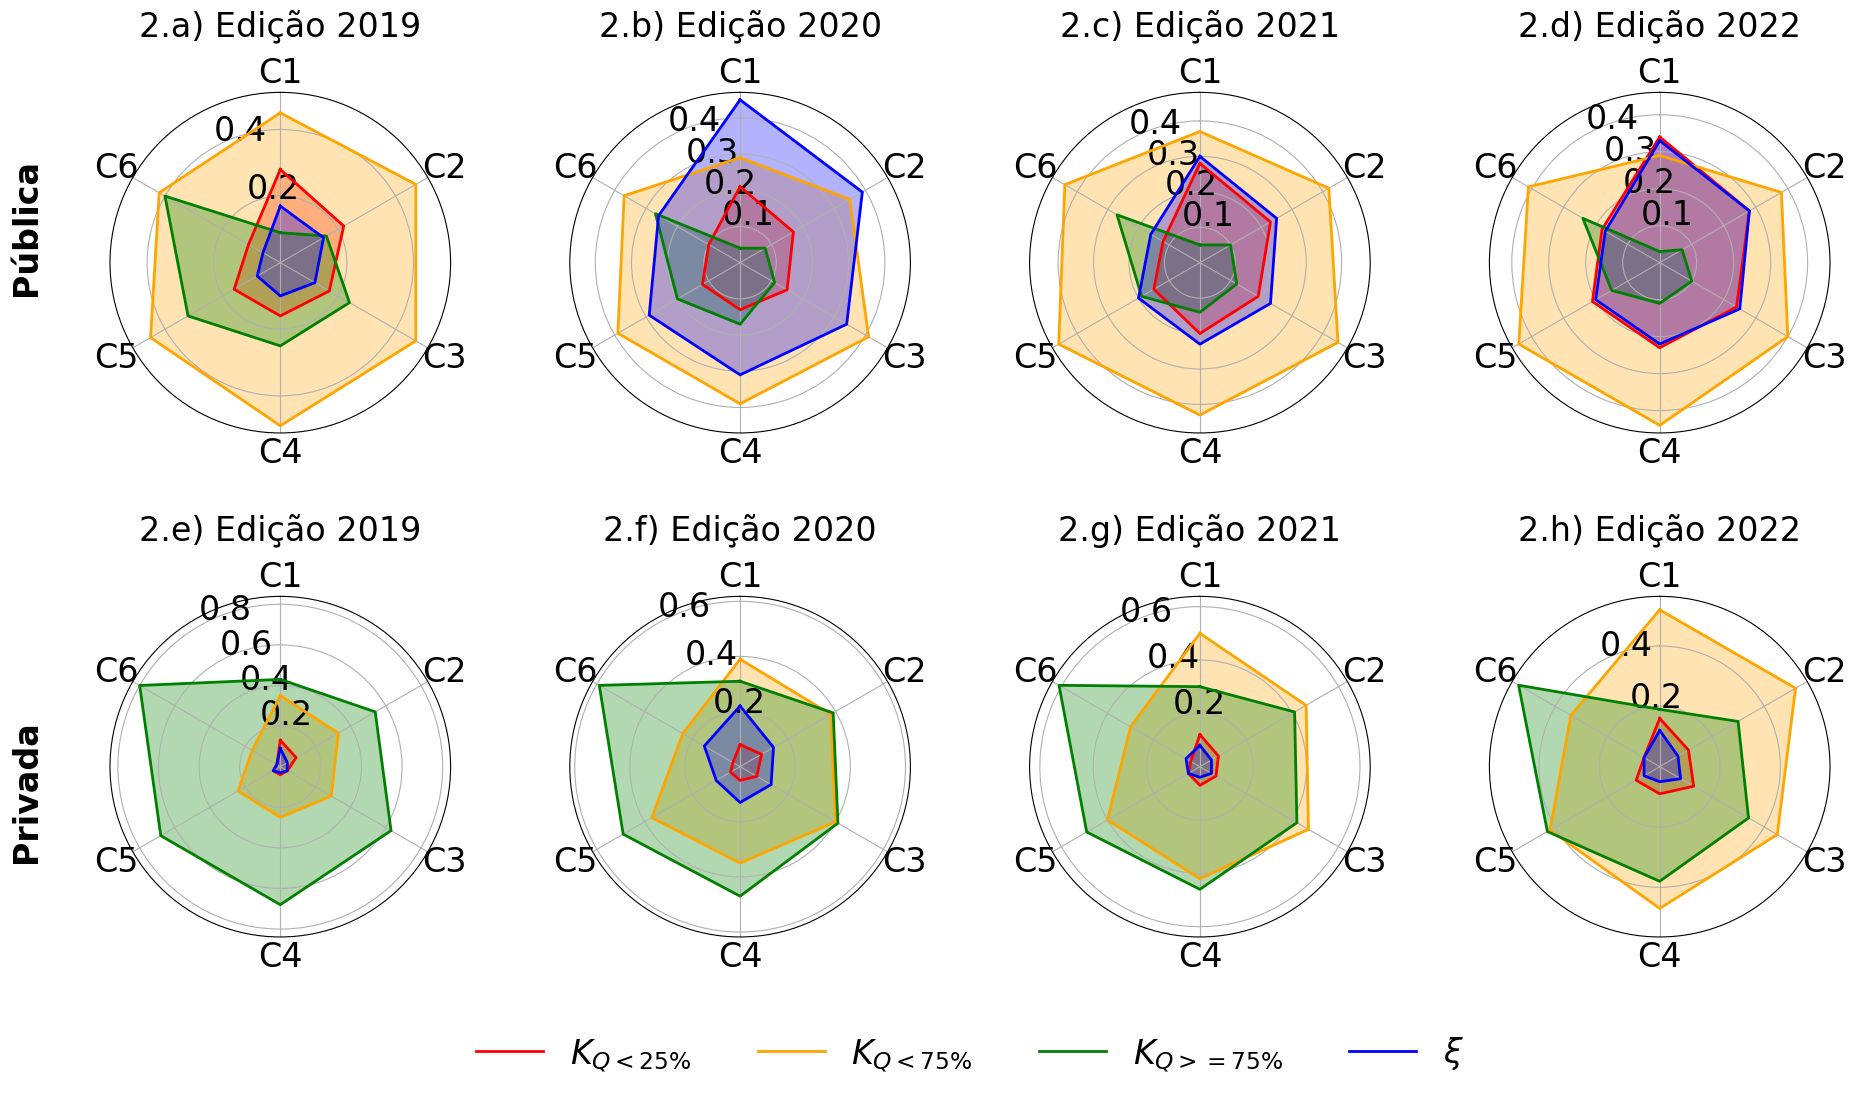

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# Anos e identificadores
anos = [19, 20, 21, 22]
pu = ['a', 'b', 'c', 'd']
pr = ['e', 'f', 'g', 'h']
cores = ['red', 'orange', 'green', 'blue']
categorias = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
N = len(categorias)

# Ângulos para radar
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Ler e organizar dados
dados_publicos = []
dados_privados = []
for ano in anos:
    dados = pd.read_csv(f'data/base_data_20{ano}.csv', sep=',')
    dados.replace({',': '.'}, regex=True, inplace=True)
    dados['Percentual'] = dados['Percentual'].astype(float)
    dados_publicos.append(dados[dados['Dependência ADM'] == 'Publica'])
    dados_privados.append(dados[dados['Dependência ADM'] == 'Privada'])

# Figura e subplots
fig, axes = plt.subplots(2, 4, subplot_kw={'projection': 'polar'}, figsize=(20, 12))
labels = ['$K_{Q<25\%}$', '$K_{Q<75\%}$', '$K_{Q>=75\%}$', r'$\xi$']

# Plotar gráficos
for linha in range(2):
    for coluna in range(4):
        ax = axes[linha, coluna]
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categorias, fontsize=24)
        ax.set_rlabel_position(-30)
        ax.tick_params(labelsize=24)

        # Seleção de dados e título
        if linha == 0:
            ax.set_title(f"2.{pu[coluna]}) Edição 20{anos[coluna]}", fontsize=24, pad=15)
            dados = dados_publicos[coluna]
        else:
            ax.set_title(f"2.{pr[coluna]}) Edição 20{anos[coluna]}", fontsize=24, pad=15)
            dados = dados_privados[coluna]

        # Linhas e preenchimentos
        for i in range(4):
            valores = dados.iloc[[0 + i, 4 + i, 8 + i, 12 + i, 16 + i, 20 + i], 4].values.flatten().tolist()
            valores += valores[:1]
            ax.plot(angles, valores, linewidth=2, color=cores[i], linestyle='solid', label=labels[i])
            ax.fill(angles, valores, alpha=0.3, color=cores[i])

# Rótulos laterais fixos usando fig.text
fig.text(0.02, 0.75, 'Pública', fontsize=24, fontweight='bold', rotation=90, va='center')
fig.text(0.02, 0.28, 'Privada', fontsize=24, fontweight='bold', rotation=90, va='center')

# Ajustes finais
fig.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.1, wspace=0.35, hspace=0.05)

# Legenda centralizada
handles = [Line2D([0], [0], color=cores[i], lw=2) for i in range(4)]
fig.legend(handles=handles, labels=labels, ncol=4, fontsize=24,
           loc='lower center', bbox_to_anchor=(0.5, 0.02), frameon=False)

# Salvar figura
fig.savefig('radar_por_edicao.png', dpi=300, bbox_inches='tight', format='png')
plt.show()